In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
!pip install opendatasets

In [3]:
import opendatasets as od

In [4]:
od.download("https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement/discussion?sort=hotness")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: varshapandian
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement


100%|██████████| 4.51k/4.51k [00:00<00:00, 5.68MB/s]

In [5]:
df=pd.read_csv("factors-affecting-campus-placement/Placement_Data_Full_Class.csv")
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [7]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [8]:
df.dtypes

,0
sl_no,int64
gender,object
ssc_p,float64
ssc_b,object
hsc_p,float64
hsc_b,object
hsc_s,object
degree_p,float64
degree_t,object
workex,object


In [9]:
print(df.isnull().sum(),'/n')

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64 /n


In [10]:
# Drop unnecessary columns
df = df.drop(columns=["sl_no", "salary"])  # 'sl_no' is just an index, 'salary' isn't needed for placement prediction

In [11]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ["gender", "ssc_b", "hsc_b", "hsc_s", "degree_t", "workex", "specialisation", "status"]
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [12]:
# Define input (X) and output (y)
X = df.drop(columns=["status"])  # All features except target
y = df["status"]  # Target variable (1 = Placed, 0 = Not Placed)

In [13]:
# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Predictions
y_pred = rf_model.predict(X_test)

In [16]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Accuracy: 0.7906976744186046
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.50      0.57        12
           1       0.82      0.90      0.86        31

    accuracy                           0.79        43
   macro avg       0.75      0.70      0.72        43
weighted avg       0.78      0.79      0.78        43



In [17]:

def predict_placement():
    print("\nEnter student details:")
    user_data = {}

    for col in X.columns:
        if col in categorical_columns:
            print(f"Options for {col}: {list(label_encoders[col].classes_)}")
            user_input = input(f"Enter {col}: ")
            user_data[col] = label_encoders[col].transform([user_input])[0]  # Convert to numerical
        else:
            user_input = float(input(f"Enter {col}: "))  # Numerical input
            user_data[col] = user_input

    # Convert user input to DataFrame
    user_df = pd.DataFrame([user_data])

    # Make prediction
    prediction = rf_model.predict(user_df)[0]

    # Display result
    result = "Placed" if prediction == 1 else "Not Placed"
    print("\nPrediction:", result)

# Run manual input function
predict_placement()


Enter student details:
Options for gender: ['F', 'M']
Enter gender: F
Enter ssc_p: 90
Options for ssc_b: ['Central', 'Others']
Enter ssc_b: Central
Enter hsc_p: 90
Options for hsc_b: ['Central', 'Others']
Enter hsc_b: Central
Options for hsc_s: ['Arts', 'Commerce', 'Science']
Enter hsc_s: Science
Enter degree_p: 90
Options for degree_t: ['Comm&Mgmt', 'Others', 'Sci&Tech']
Enter degree_t: Sci&Tech
Options for workex: ['No', 'Yes']
Enter workex: No
Enter etest_p: 90
Options for specialisation: ['Mkt&Fin', 'Mkt&HR']
Enter specialisation: Mkt&Fin
Enter mba_p: 90

Prediction: Placed


In [18]:
print("Class distribution:\n", y.value_counts())  # Check data imbalance
print("Feature importance:\n", rf_model.feature_importances_)  # See if one feature dominates
print("Train Accuracy:", rf_model.score(X_train, y_train))
print("Test Accuracy:", rf_model.score(X_test, y_test))

Class distribution:
 status
1    148
0     67
Name: count, dtype: int64
Feature importance:
 [0.0184448  0.32893962 0.01460254 0.16445537 0.01079729 0.01637651
 0.18183782 0.01612872 0.03781196 0.06626974 0.03108065 0.11325498]
Train Accuracy: 1.0
Test Accuracy: 0.7906976744186046


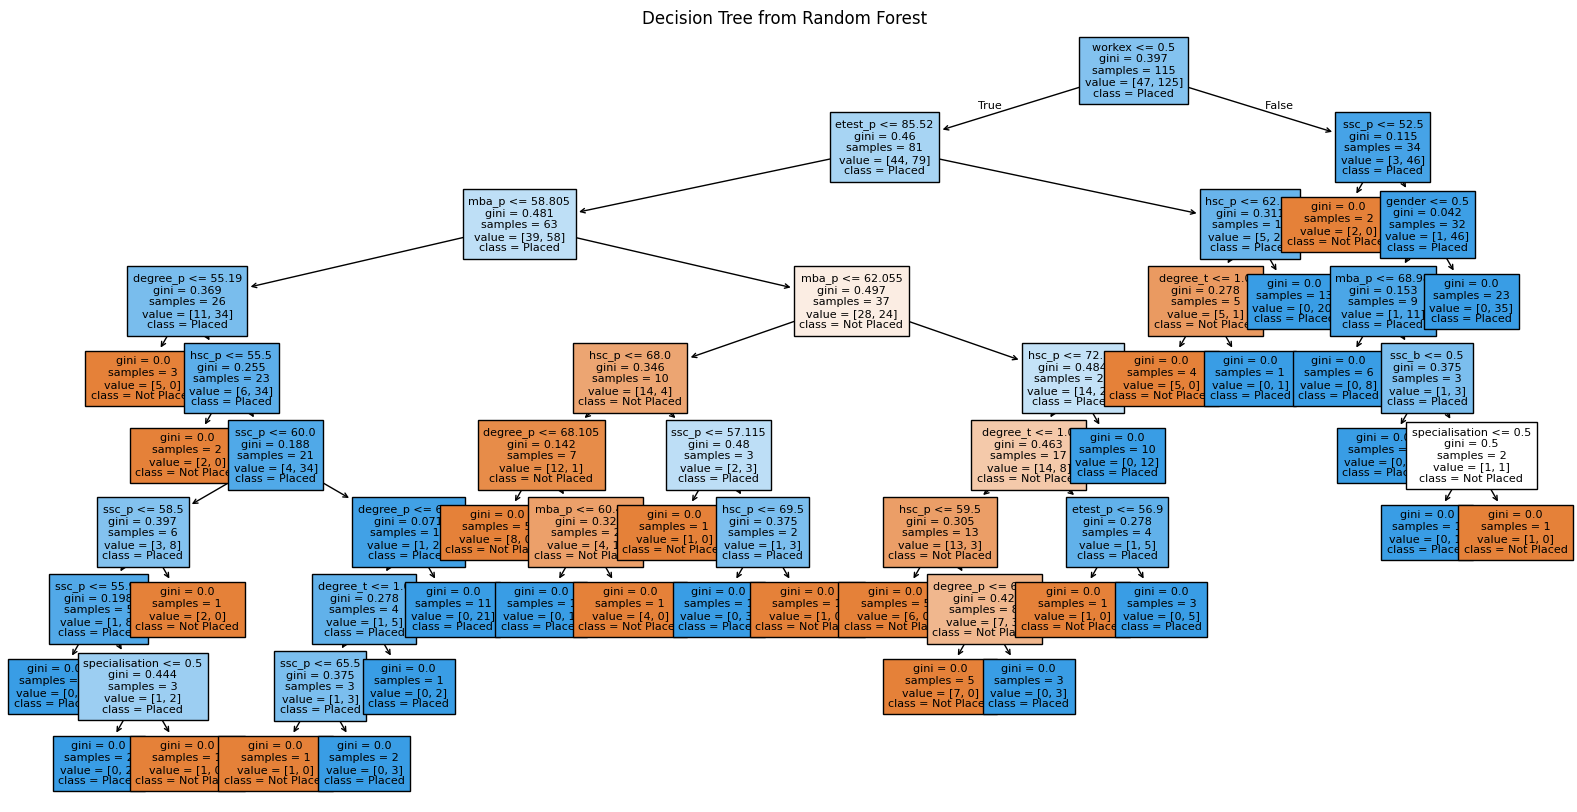

/tmp/ipython-input-3831294213.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")


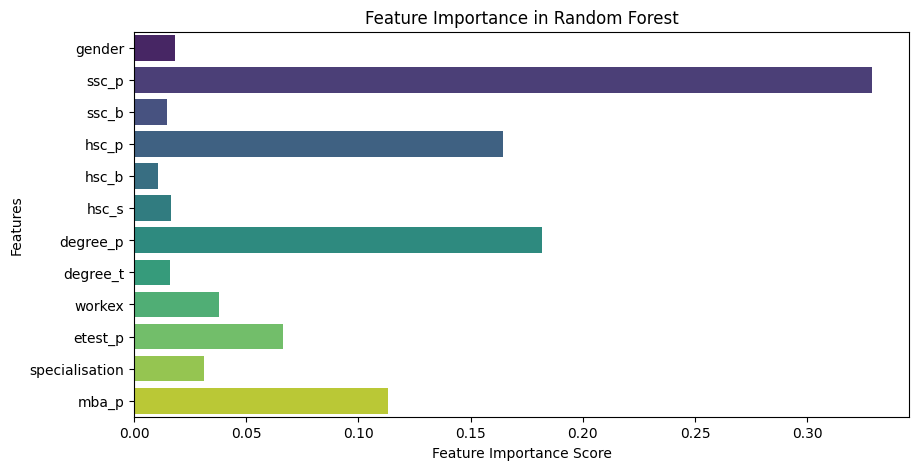

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
# Assuming 'rf_model' is your trained Random Forest model
# Assuming 'X_train' contains your training features

# Plot one of the trees from the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0],
          feature_names=X_train.columns,
          class_names=['Not Placed', 'Placed'],
          filled=True, fontsize=8)
plt.title("Decision Tree from Random Forest")
plt.show()

# Plot feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()
